In [1]:
import random
import math
from datetime import datetime
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import copy
from statistics import mean
import matplotlib.pyplot as plt

In [2]:
Operators = ["+", '-', '*', '/', "sin" , "cos" , "x"]
Values = list (range(1,11))
variable = ['x']

In [4]:
def function(x):
    return 2 * (x**2) + 3 * x + 1


In [5]:
X_train = np.random.randint(1, 100, size=(20, 1))
y_train = function(X_train[:,0])
len(X_train)
y_train

array([  780,  2850,  1225,  7626, 14365,   120,  2016,   435,    15,
          91, 10878,  9180,  2850,   861,   120, 12403,   231,  8385,
        4753,  1035])

In [6]:
class Node() :
    def __init__(self , operator , children) :
        self.operator = operator
        self.children = children
        self.isLeaf= False
        self.value = 0

In [7]:
class Tree () :
    def __init__(self , max_depth = 6) :
        self.max_depth = max_depth
        self.root = None
    def createFromRoot (self , node):
        self.root = node

    def returnRoot (self):
        node = self.root
        return node

    def create (self):
        self.root  = self.grow()

    def printTree (self , node = None):
        if (node == None):
            print(self.to_math_string(self.root))
        else:
            print(self.to_math_string(node))


    def grow (self , depth = 0 ):

        temp_op = random.choice(Operators)
        temp_rand = random.randint(0 , 10)

        if (depth == self.max_depth or temp_rand > 7):
            if (temp_op == "sin" or temp_op == "cos"):
                temp_node = Node (operator=temp_op, children=["x"])
                temp_node.isLeaf = True
                return temp_node
            else :
                child = random.choice(Values)
                temp_node = Node (operator= temp_op , children=["x",child])
                temp_node.isLeaf = True
                return temp_node

        else:
            if (temp_op == "sin" or temp_op == "cos"):
                child = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[child])
                return temp_node
            else :
                left_node  = self.grow ( depth= depth + 1 )
                right_node = self.grow ( depth= depth + 1 )
                temp_node = Node (operator= temp_op , children=[left_node,right_node])
                return temp_node

    def to_math_string(self , node):
        if isinstance ( node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    return f"{node.operator}({node.children[0]})"
                else:
                    return f"({node.children[0]} {node.operator} {node.children[1]})"
            else:
                if len(node.children) == 1:
                    return f"{node.operator}({self.to_math_string(node.children[0])})"
                else:
                    return f"({self.to_math_string(node.children[0])} {node.operator} {self.to_math_string(node.children[1])})"


    def calculate (self , val):
        return self.calculator ( self.root , val)


    def calculator (self , node , val):
        if isinstance (node , Node):
            if node.isLeaf:
                if len(node.children) == 1:
                    node.value = self.SinCosOp (node , val)
                    # return node.value
                else :
                    node.value = self.OtherOp (node , val , node.children[1])
                    # return node.value
            else:
                if len(node.children) == 1:
                    temp_val = self.calculator(node.children[0] , val)
                    node.value = self.SinCosOp (node , temp_val)
                else :
                    temp_val1 = self.calculator(node.children[0], val)
                    temp_val2 = self.calculator(node.children[1], val)
                    node.value = self.OtherOp (node , temp_val1 , temp_val2)
            return node.value



    def SinCosOp (self , node , val):
        if (node.operator == "sin"):
            return np.sin(val)
        if (node.operator == "cos"):
            return np.cos(val)

    def OtherOp (self , node , val1 , val2):
        if (node.operator == "+"):
            return val1+val2
        elif (node.operator == "-"):
            return val1-val2
        elif (node.operator == "*"):
            return val1*val2
        elif (node.operator == "/"):
            if(val2==0):
                return 1
            return val1/val2
        elif (node.operator == "^"):
            if(val1==0 and val2<0):
                    return 1
            else:
                # return left_val ** right_val
                if(val2==0):
                    return 1
                x = 1
                i = 0
                while(not flag and i<val2):
                    x = x*val1
                    i+=1
                    if(x>100000 or x<-100000):
                        flag = True
                        return 1
                return x

    def TreeToList (self):
        root = self.root
        nodes = []
        self.traverse(root , nodes)
        return nodes

    def traverse (self , node , nodes):
        nodes.append(node)
        if (node.isLeaf == False):
            for i in range (len(node.children)):
                self.traverse (node.children[i] , nodes)

    def ReplaceNode (self , selfNode , replaceNode):


        root = self.root
        self.root = self.traverseToFind (root , selfNode , replaceNode)
        # self.printTree(self.root)

    def traverseToFind (self ,node , selfNode , replaceNode):
        if (node == selfNode ):
                node = copy.deepcopy(replaceNode)
                return node
        else :
            if (node.isLeaf == False):
                for i in range (len(node.children)):
                    node.children[i]= self.traverseToFind(node.children[i] , selfNode , replaceNode)

            return node

In [10]:
treeList = []
for i in range(25):
    my_tree = Tree(random.randint(1, 5))
    my_tree.create()
    treeList.append(my_tree)
    my_tree.printTree()

mseTree = []
for tree in treeList:
    # Example code for calculating MSE here
    pass

print(mseTree)

(x / 7)
(x - 10)
((x / 8) x ((sin(x) * sin((x * 5))) + sin((sin(x) x (x - 10)))))
(((cos(x) - (x + 6)) / (x + 6)) + (x + 5))
(cos((sin(sin(x)) * (sin(x) + sin(x)))) + (x / 5))
(((((x * 1) * (x * 4)) + ((x - 2) - (x - 2))) * cos(x)) / (x / 5))
(x - 5)
(x x 3)
(((x * 10) * (sin(((x - 7) / (x x 8))) + (cos((x - 6)) - (x + 2)))) x (((((x - 8) + (x x 8)) x (x / 7)) x (((x * 8) + (x x 3)) - cos(x))) * (x - 4)))
(x * 1)
(x - 7)
(x / 8)
((x + 7) + (x / 8))
((((x - 8) * cos(x)) - (x x 10)) + ((x x 7) - sin(sin((x + 9)))))
((x * 1) - (x x 1))
((x + 1) + (sin(x) x cos(cos(x))))
(cos(((((x / 2) / (x * 7)) x (x x 3)) - ((x - 3) * (x * 7)))) * (x / 9))
cos(x)
(x x 4)
sin((((x x 5) - sin((x * 8))) x cos(sin((x * 3)))))
((sin(sin(x)) - (x * 8)) x ((((x * 7) / cos(x)) * ((x x 4) / (x - 2))) / sin(x)))
((x x 8) * cos(x))
(x + 5)
((x x 4) x sin(sin(x)))
(cos(x) + (cos(x) / cos(x)))
[]


In [20]:


# Assuming X_train and y_train are defined elsewhere

avg = []
for i in range(1000):
    bestTrees = []
    mseTree = np.array(mseTree)  # Convert mseTree to a NumPy array
    bestTreesIndex = np.argsort(mseTree)[:5]  # Use np.argsort() instead of mseTree.argsort()

    for j in range(len(bestTreesIndex)):
        bestTrees.append(treeList[bestTreesIndex[j]])

    treeList = []
    for j in range(len(bestTrees)):
        treeList.append(bestTrees[j])
        for k in range(j + 1, len(bestTrees)):

            temp1 = copy.deepcopy(bestTrees[j])
            temp2 = copy.deepcopy(bestTrees[k])

            nodes1 = temp1.TreeToList()
            nodes2 = temp2.TreeToList()

            select1 = random.choice(nodes1)
            select2 = random.choice(nodes2)

            temp1.ReplaceNode(select1, select2)
            temp2.ReplaceNode(select2, select1)

            treeList.append(temp1)
            treeList.append(temp2)

    mseTree = []
    for tree in treeList:
        valueList = []
        for j in range(len(X_train)):
            temp = tree.calculate(X_train[j][0])
            valueList.append(temp)
        valueList = np.array(valueList)
        mse = mean_squared_error(y_train, valueList)
        mseTree.append(abs(mse))

    sorted_list = sorted(mseTree)
    lowest_five = sorted_list[:5]
    if all(val == 0 for val in lowest_five):  # Check if all elements are zero
        avg.append(0)
    else:
        avg.append(sum(lowest_five) / len(lowest_five))

avg = np.array(avg)
avg


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

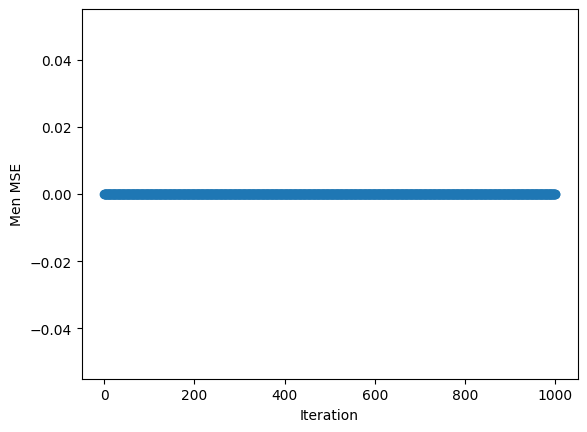

In [19]:
plt.scatter(range(len(avg)), avg)
plt.xlabel('Iteration')
plt.ylabel('Men MSE')

plt.show()